<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 5 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 6 October 2022</div>
<div style="text-align: right">Neural style transfer</div>

# This is very very cery complicated...

In [14]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

In [15]:
tf.compat.v1.enable_eager_execution()

In [16]:
imga = tf.io.decode_image(
      tf.io.read_file("toons/fx/P1250231b.jpg"),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]

In [17]:
imga

<tf.Tensor: shape=(1, 652, 1160, 3), dtype=float32, numpy=
array([[[[0.25882354, 0.28235295, 0.227451  ],
         [0.26666668, 0.2901961 , 0.24313727],
         [0.28235295, 0.29411766, 0.25882354],
         ...,
         [0.3647059 , 0.41176474, 0.16862746],
         [0.43529415, 0.47450984, 0.227451  ],
         [0.4784314 , 0.52156866, 0.2627451 ]],

        [[0.25490198, 0.2784314 , 0.22352943],
         [0.27058825, 0.29411766, 0.2392157 ],
         [0.28627452, 0.29803923, 0.2627451 ],
         ...,
         [0.627451  , 0.6784314 , 0.4039216 ],
         [0.63529414, 0.68235296, 0.40000004],
         [0.5372549 , 0.58431375, 0.28627452]],

        [[0.2784314 , 0.30588236, 0.24313727],
         [0.28627452, 0.3137255 , 0.2509804 ],
         [0.27450982, 0.28627452, 0.24313727],
         ...,
         [0.63529414, 0.69411767, 0.36078432],
         [0.5686275 , 0.63529414, 0.27450982],
         [0.627451  , 0.69411767, 0.31764707]],

        ...,

        [[0.33333334, 0.36078432,

In [18]:
imgb = tf.io.decode_image(
      tf.io.read_file("toons/fx/starry-nightb.jpg"),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]

In [19]:
imgb

<tf.Tensor: shape=(1, 652, 1160, 3), dtype=float32, numpy=
array([[[[0.04313726, 0.0627451 , 0.18823531],
         [0.08235294, 0.10196079, 0.227451  ],
         [0.14509805, 0.16862746, 0.3019608 ],
         ...,
         [0.9843138 , 0.96470594, 0.98823535],
         [0.9843138 , 0.96470594, 0.9921569 ],
         [0.98823535, 0.96470594, 1.        ]],

        [[0.3372549 , 0.35686275, 0.47450984],
         [0.1764706 , 0.20392159, 0.31764707],
         [0.21568629, 0.24313727, 0.35686275],
         ...,
         [0.35686275, 0.36078432, 0.4784314 ],
         [0.27450982, 0.2784314 , 0.40000004],
         [0.24313727, 0.24313727, 0.37647063]],

        [[0.27450982, 0.30588236, 0.39607847],
         [0.1137255 , 0.14509805, 0.23529413],
         [0.23529413, 0.26666668, 0.35686275],
         ...,
         [0.16862746, 0.23137257, 0.53333336],
         [0.21568629, 0.2784314 , 0.58431375],
         [0.1254902 , 0.18823531, 0.49411768]],

        ...,

        [[0.41176474, 0.43137258,

In [20]:
imga2 = tf.image.resize(imga, (512, 256), preserve_aspect_ratio=True)
imga2

<tf.Tensor: shape=(1, 144, 256, 3), dtype=float32, numpy=
array([[[[0.27852583, 0.29375002, 0.24786903],
         [0.20373096, 0.20950438, 0.1379902 ],
         [0.2464112 , 0.25033277, 0.18109256],
         ...,
         [0.6517821 , 0.7034841 , 0.47908583],
         [0.7033906 , 0.7679671 , 0.40674192],
         [0.62194055, 0.68009937, 0.35530624]],

        [[0.22445875, 0.24498571, 0.15362287],
         [0.21051115, 0.22227585, 0.11478504],
         [0.23842935, 0.24627249, 0.15858099],
         ...,
         [0.6269915 , 0.6657374 , 0.43077004],
         [0.75936484, 0.8222402 , 0.37862542],
         [0.79154927, 0.8532655 , 0.43188575]],

        [[0.26210853, 0.28055218, 0.1691551 ],
         [0.21922064, 0.23098534, 0.11174514],
         [0.23082024, 0.24132457, 0.14057139],
         ...,
         [0.57409966, 0.60571563, 0.39964944],
         [0.7220988 , 0.75972146, 0.347915  ],
         [0.7885519 , 0.8356567 , 0.39095694]],

        ...,

        [[0.36852688, 0.33394074, 

In [21]:
imgb2 = tf.image.resize(imgb, (512, 256), preserve_aspect_ratio=True)
imgb2

<tf.Tensor: shape=(1, 144, 256, 3), dtype=float32, numpy=
array([[[[0.20672914, 0.23717576, 0.33292738],
         [0.1382285 , 0.16303958, 0.2563649 ],
         [0.30094978, 0.3039667 , 0.28844044],
         ...,
         [0.23472393, 0.3151246 , 0.5874685 ],
         [0.22666039, 0.28848213, 0.50694025],
         [0.21693987, 0.26579607, 0.52515745]],

        [[0.05839206, 0.06437654, 0.16458336],
         [0.16928361, 0.18138787, 0.3523029 ],
         [0.02893943, 0.06327358, 0.1572891 ],
         ...,
         [0.13907525, 0.22210221, 0.53578943],
         [0.20994693, 0.30048257, 0.5804969 ],
         [0.22983047, 0.3071206 , 0.6051598 ]],

        [[0.15694606, 0.2031309 , 0.36485475],
         [0.101994  , 0.15256761, 0.31389576],
         [0.36292726, 0.44507083, 0.62041974],
         ...,
         [0.17940325, 0.24831581, 0.5886617 ],
         [0.3620609 , 0.4646191 , 0.68548304],
         [0.30452752, 0.41478848, 0.5965414 ]],

        ...,

        [[0.23455667, 0.26083767, 

In [33]:
imga2.shape[1]

144

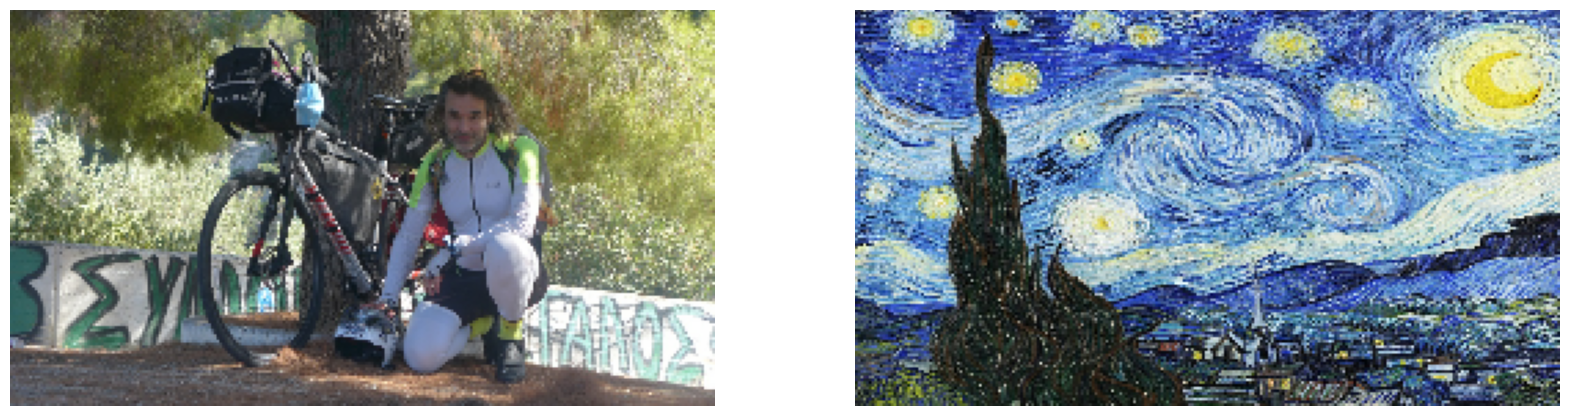

In [34]:
images = [imga2,imgb2]
noi = len(images)
image_sizes = [image.shape[1] for image in images]
w = (image_sizes[0] * 6) // 80
plt.figure(figsize=(w  * noi, w))
grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)

for i in range(noi):
    plt.subplot(grid_look[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.savefig("final.jpg")
plt.show()

In [40]:
def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [41]:
def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 80
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

In [42]:
original_image = load_image("toons/fx/P1250231b.jpg")
style_image = load_image("toons/fx/starry-nightb.jpg")

In [43]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')

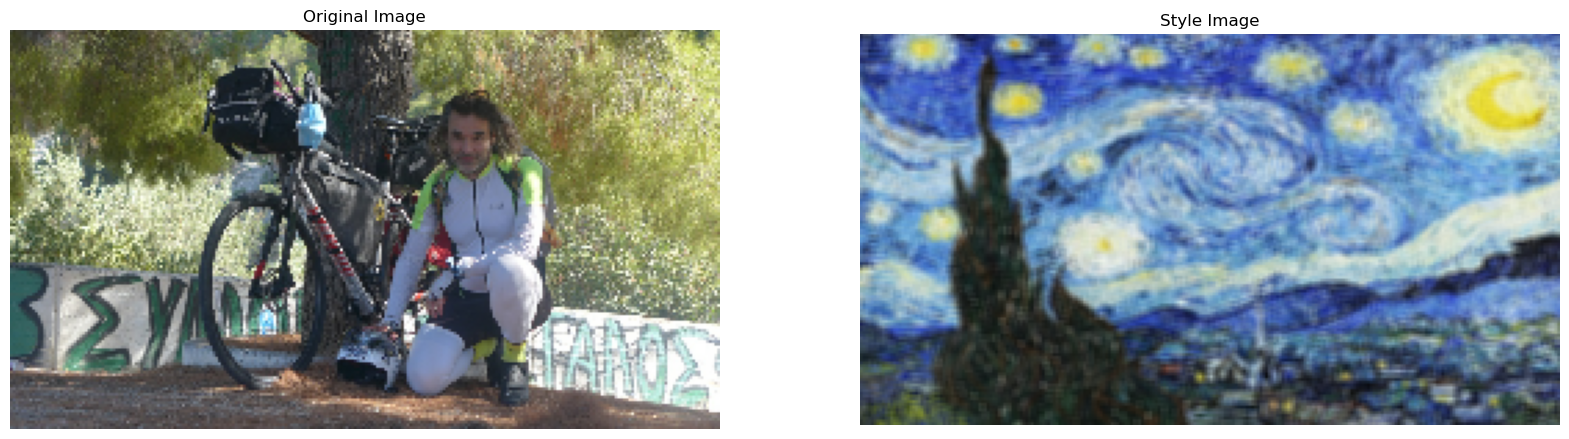

In [44]:
visualize([original_image, style_image], ['Original Image', 'Style Image'])

In [52]:
stylize_model = tf_hub.load('hh')

UnsupportedHandleError: unsupported handle format 'hh'. No resolvers found that can successfully resolve it. If the handle points to the local filesystem, the error indicates that the module directory does not exist. Supported handle formats: URLs pointing to a TGZ  file (e.g. https://address/module.tgz), or Local File System directory file (e.g. /tmp/my_local_module).

In [46]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_photo = results[0]

NameError: name 'stylize_model' is not defined

In [47]:
visualize([original_image, style_image, stylized_photo], titles=['Original Image', 'Style Image', 'Stylized Image'])

NameError: name 'stylized_photo' is not defined

In [48]:
def export_image(tf_img):
    tf_img = tf_img*255
    tf_img = np.array(tf_img, dtype=np.uint8)
    if np.ndim(tf_img)>3:
        assert tf_img.shape[0] == 1
        img = tf_img[0]
    return PIL.Image.fromarray(img)

In [ ]:
export_image(stylized_photo).save("P1250231c.jpg")

In [ ]:
original_image = load_image("ipynb.images/horse.jpg")
style_image = load_image("ipynb.images/zebra.jpg")

In [ ]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')

In [ ]:
visualize([original_image, style_image], ['Original Image', 'Style Image'])

In [ ]:
stylize_model = tf_hub.load('tf_model')

In [ ]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_photo = results[0]

In [ ]:
visualize([original_image, style_image, stylized_photo], titles=['Original Image', 'Style Image', 'Stylized Image'])

In [ ]:
original_image = load_image("ipynb.images/horse2.jpg")
style_image = load_image("ipynb.images/zebra2.jpg")

In [ ]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')

In [ ]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_photo = results[0]

In [ ]:
visualize([original_image, style_image, stylized_photo], titles=['Original Image', 'Style Image', 'Stylized Image'])

In [ ]:
def visualize2(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1].value for image in images]
    w = (image_sizes[0] * 6) // 80
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)

    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(np.flipud(images[i][0]), aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

In [ ]:
visualize2([original_image, style_image, stylized_photo], titles=['Original Image', 'Style Image', 'Stylized Image'])